In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1数据载入和总览
## 1.1 数据载入(pd.read_csv())¶


In [3]:
data_01 = pd.read_csv('./data_01.csv')
data_02 = pd.read_csv('./data_02.csv')
data_03 = pd.read_csv('./data_03.csv')

## 1.2 数据合并(pd.concat())¶


 pandas.concat可以沿着一条轴将多个对象堆叠到一起，这里我们要把data_01.csv/data_02.csv/data_03.csv三份数据集合并为一份数据进行后续分析处理

pd.concat(objs, axis=0, join='outer')

合并多个对象时需要放到一个列表中；axis=0默认按照0轴堆叠，axis=1指合并列；concat函数可按照其他轴的逻辑关系进行合并，默认join='outer'，还有一个可取的值是'inner'

In [4]:
data = pd.concat([data_01,data_02,data_03])

各字段含义

cand_nm – 接受捐赠的候选人姓名<br>
contbr_nm – 捐赠人姓名<br>
contbr_st – 捐赠人所在州<br>
contbr_employer – 捐赠人所在公司<br>
contbr_occupation – 捐赠人职业<br>
contb_receipt_amt – 捐赠数额（美元）<br>
contb_receipt_dt – 收到捐款的日期

## 1.3 数据预览和基本统计分析


In [5]:
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 non-null object
contbr_nm            1001733 non-null object
contbr_st            1001729 non-null object
contbr_employer      988004 non-null object
contbr_occupation    993303 non-null object
contb_receipt_amt    1001733 non-null float64
contb_receipt_dt     1001733 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [7]:
#用统计学指标快速描述数据的概要
data.describe()

,contb_receipt_amt
count,1.001733e+06
mean,2.982358e+02
std,3.749663e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


# 2. 数据清洗
## 2.1 缺失值处理¶

In [8]:
#从data.info()得知，contbr_employer、contbr_occupation均有少量缺失值,均填充为NOT PROVIDED
data['contbr_employer'].fillna('NOT PROVIDED',inplace=True)
data['contbr_occupation'].fillna('NOT PROVIDED',inplace=True)

## 2.2 数据转换
## 利用字典映射进行转换：党派分析

美国大选一般是民主党和共和党之争，虽然数据中没有党派这个字段，但是通过候选人名称即cand_nm，可以得到对应的党派信息



In [9]:
#查看数据中总统候选人都有谁
print('共有{}位候选人，分别是'.format(len(data['cand_nm'].unique())))
data['cand_nm'].unique()

共有13位候选人，分别是


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [10]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

增加一列party存储党派信息

In [11]:
#通过map映射函数，增加一列party存储党派信息
data['party']=data['cand_nm'].map(parties)
#查看两个党派的情况
data['party'].value_counts()

Democrat      593747
Republican    407986
Name: party, dtype: int64

可以看出Republican（共和党）接受的赞助总金额更高，Democrat（民主党）获得的赞助次数更多一些



## 排序：按照职业汇总对赞助总金额进行排序¶


按照职位进行汇总，计算赞助总金额，展示前20项，发现不少职业是相同的，只不过是表达不一样而已，如C.E.O.与CEO，都是一个职业

DataFrame.sort_values(by, ascending=True, inplace=False)<br>

by是根据哪一列进行排序，可以传入多列；ascending=True是升序排序，False为降序；inplace=Ture则是修改原dataframe，默认为False

In [12]:
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED                                   48176647.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
NOT PROVIDED                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

## 利用函数进行数据转换：职业与雇主信息分析¶


许多职业都涉及相同的基本工作类型，下面我们来清理一下这样的数据（这里巧妙地利用了dict.get它允许没有映射关系的职业也能“通过”）

In [13]:
#建立一个职业对应字典，吧相同职业的不同表达映射对应的职业，比如C.E.O映射到CEO

In [15]:
occupation_map={
   'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}
## 如果不在字典中,返回x
f = lambda x : occupation_map.get(x,x)
data.contbr_occupation = data.contbr_occupation.map(f)

同样地，对雇主信息进行类似转换

In [16]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)

# 2.3 数据筛选
## 赞助金额筛选

赞助包括退款（负的出资额），为了简化分析过程，我们限定数据集只有正出资额

In [17]:
data = data[data['contb_receipt_amt']>0]

## 候选人筛选（Obama、Romney）
 从下面可以卡出，赞助基本集中在Obama、Romney之间，为了更好的聚焦在两者间的竞争，我们选取这两位候选人的数据子集作进一步分析



In [18]:
#查看各候选人获得的赞助总金额
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.358776e+08
Romney, Mitt                      8.833591e+07
Paul, Ron                         2.100962e+07
Perry, Rick                       2.030675e+07
Gingrich, Newt                    1.283277e+07
Santorum, Rick                    1.104316e+07
Cain, Herman                      7.101082e+06
Pawlenty, Timothy                 6.004819e+06
Huntsman, Jon                     3.330373e+06
Bachmann, Michelle                2.711439e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.730099e+05
McCotter, Thaddeus G              3.903000e+04
Name: contb_receipt_amt, dtype: float64

In [19]:
#选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()

## 2.4 面元化数据¶


接下来我们对该数据做另一种非常实用的分析，利用cut函数根据出资额大小将数据离散化到多个面元中：

In [20]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
201356        (10, 100]
201357          (1, 10]
201358        (10, 100]
201359        (10, 100]
201360        (10, 100]
201361        (10, 100]
201362      (100, 1000]
201363        (10, 100]
201364        (10, 100]
201365        (10, 100]
201366        (1

# 3. 数据聚合与分组运算¶


分组计算Grouping，分组运算是一个“split-apply-combine”的过程：<br>

拆分，pandas对象中的数据会根据你所提供的一个或多个键被拆分为多组
应用，将一个函数应用到各个分组并产生一个新值
合并，所有这些函数的执行结果会合并到最终的结果对象中


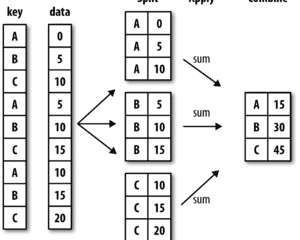

## 3.1 透视表(pivot_table)分析党派和职业

我们可以通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资不足200万美元的数据：

In [21]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
#过滤掉赞助金额小于200W的数据
over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14302461.84,7.868419e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
MANAGER,762883.22,1.444532e+06
NOT PROVIDED,13725187.32,2.097161e+07


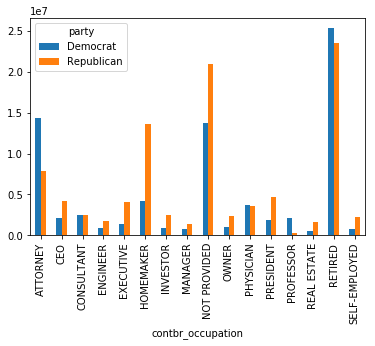

In [22]:
over_2mm.plot(kind='bar')

## 3.2 分组级运算和转换
## 根据职业与雇主信息分组运算¶
我们接下来了解一下对Obama和Romney总出资最高的职业和雇主。注意，这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”


In [23]:
#由于职业和雇主的处理非常相似，我们定义函数get_top_amounts()对两个字段进行分析处理

def get_top_amounts(group,key,n=5):
#传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
  
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305316.38
               ATTORNEY             14302461.84
               NOT PROVIDED         13725187.32
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               CONSULTANT            2459912.71
               PROFESSOR             2165071.08
Romney, Mitt   NOT PROVIDED         11638509.84
               RETIRED              11508473.59
               HOMEMAKER             8147446.22
               ATTORNEY              5372424.02
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

从数据可以看出，Obama更受精英群体（律师、医生、咨询顾问）的欢迎，Romney则得到更多企业家或企业高管的支持


In [24]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694558.85
               SELF-EMPLOYED         18626807.16
               NOT PROVIDED          13883494.03
               NOT EMPLOYED           8586308.70
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12321731.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

Obama：微软、盛德国际律师事务所； Romney：瑞士瑞信银行、摩根斯坦利、高盛公司、巴克莱资本、H.I.G.资本

## 对赞助金额进行分组分析(matplotlib画图)¶


前面我们已经利用pd.cut()函数，根据出资额大小将数据离散化到多个面元中，接下来我们就要对每个离散化的面元进行分组分析<br>

首先统计各出资区间的赞助笔数，这里用到unstack()，stack()函数是堆叠，unstack()函数就是不要堆叠，即把多层索引变为表格数据

In [26]:
#labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153992.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


接下来，我们再统计各区间的赞助金额



In [27]:
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


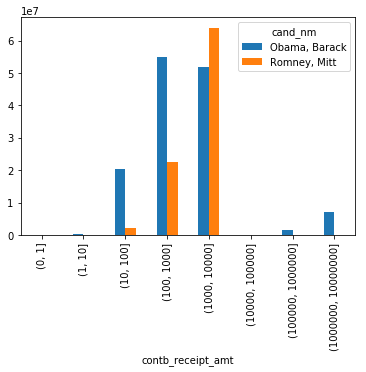

In [28]:
#Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

上图虽然能够大概看出Obama、Romney的赞助金额区间分布，但对比并不够突出，如果用百分比堆积图效果会更好，下面我们就实现以下。

In [29]:
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710177,0.289823
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


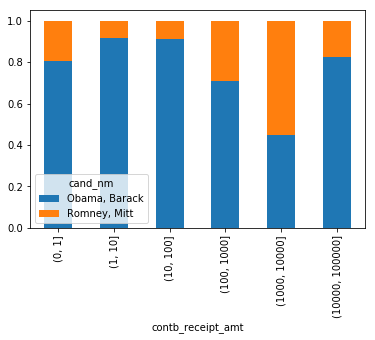

In [30]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)

可以看出，小额赞助方面，Obama获得的数量和金额比Romney多得多

## 按照赞助人姓名分组计数，计算重复赞助次数最多的前20人

In [32]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
SEBAG, DAVID             161
SMITH, ERIK              145
FALLSGRAFF, TOBY         138
SKINNER, DONNA           136
CASPERSON, CAROLINA      132
HARRIS, CLAUDIA W.       132
ROSBERG, MARILYN         115
POTTS, LILLIE            114
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
DFHDFH, DFHDFH            96
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
SMITH, CHARLES            88
KARIMIAN, AFSANEH         87
NURU, ISAAC               87
MASTERS, MARGERY          85
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64

# 4.时间处理¶


## 4.1 str转datetime¶

我们可以使用to_datetime方法解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快。我们也可以指定特定的日期解析格式，如pd.to_datetime(series,format='%Y%m%d')


In [35]:
data_vs['time'] = pd.to_datetime(data_vs['contb_receipt_dt'])

## 4.2 以时间作为索引¶


In [36]:
data_vs.set_index('time',inplace=True)
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
time,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-AUG-11,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,Republican


## 4.3重采样和频度转换
重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），resample会对数据进行分组，然后再调用聚合函数。这里我们把频率从每日转换为每月，属于高频转低频的降采样。



In [37]:
vs_time = data_vs.groupby('cand_nm').resample('M')['cand_nm'].count()
vs_time.unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
time,,
2011-04-30,13830,1096
2011-05-31,12182,4163
2011-06-30,25626,5757
2011-07-31,12372,2454
2011-08-31,19860,3226
2011-09-30,46927,7968
2011-10-31,25941,5349
2011-11-30,32629,7737
2011-12-31,63562,10289


我们用面积图把11年4月-12年4月两位总统候选人接受的赞助笔数做个对比可以看出，越临近竞选，大家赞助的热情越高涨，奥巴马在各个时段都占据绝对的优势


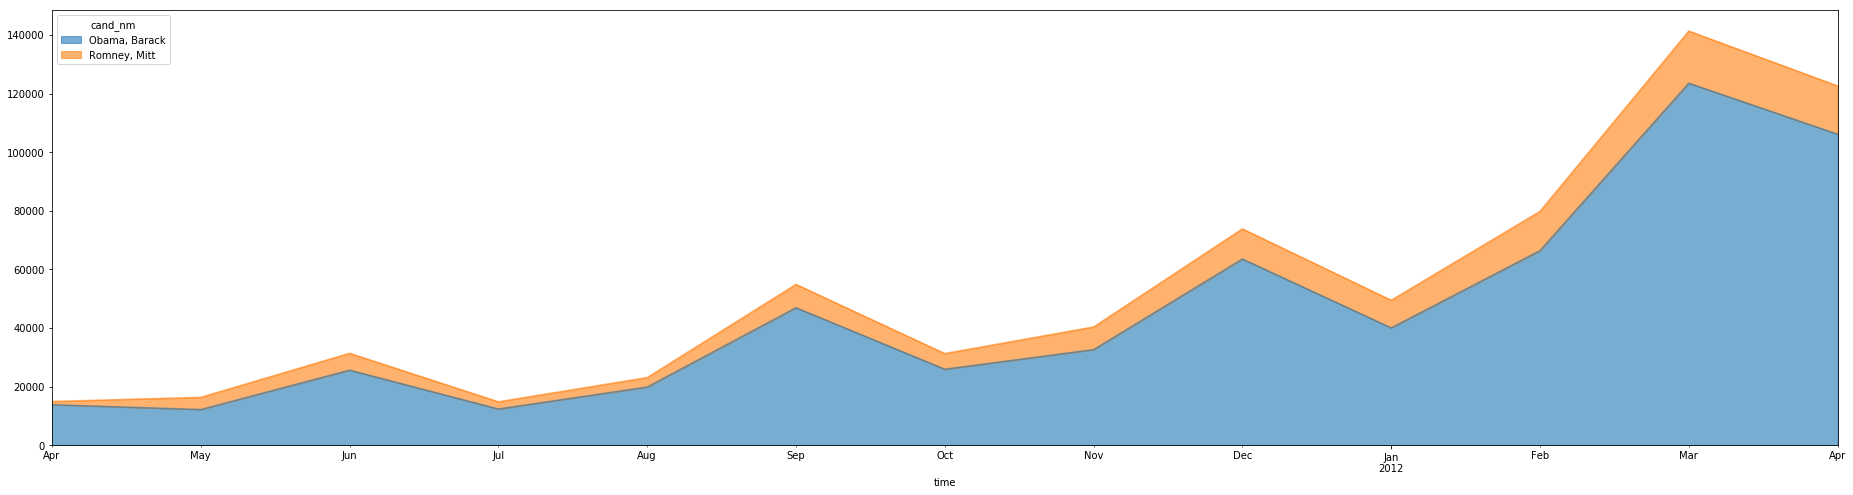

In [39]:
fig1, ax1=plt.subplots(figsize=(32,8))
vs_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()